<a href="https://colab.research.google.com/github/nafl13/ICT_DSA/blob/Assignments/Casestudy_dataaquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

Dataset
[link text](https://drive.google.com/file/d/1sJoHHJVJq97RrouByToKxr24x3w-HftH/view?usp=sharing)

In [3]:
df = pd.read_csv('/content/stroke_prediction_dataset.csv')

In [4]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [13]:
df.shape

(15000, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [8]:
df.isna().sum()

,0
Patient ID,0
Patient Name,0
Age,0
Gender,0
Hypertension,0
Heart Disease,0
Marital Status,0
Work Type,0
Residence Type,0
Average Glucose Level,0


In [11]:
df['Work Type'].unique()

array(['Self-employed', 'Never Worked', 'Private', 'Government Job'],
      dtype=object)

In [14]:
df['Stress Levels'].mode()

,Stress Levels
0,2.08
1,6.32


In [15]:
df['Stress Levels'].mean()

5.022694

In [16]:
df['Stress Levels'].median()

5.05

In [35]:
import numpy as np
# Calculate Q1 and Q3
Q1 = df['Stress Levels'].quantile(0.25)
Q3 = df['Stress Levels'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Stress Levels'] < lower_bound) | (df['Stress Levels'] > upper_bound)]

print("Potential Outliers based on IQR Method:\n")
if outliers.empty:
    print("No outliers were detected using the IQR method because all the data points in the dataset fall within the calculated bounds.")
else:
    print(outliers)


Potential Outliers based on IQR Method:

No outliers found.

No outliers were detected using the IQR method because all the data points in the dataset fall within the calculated bounds.


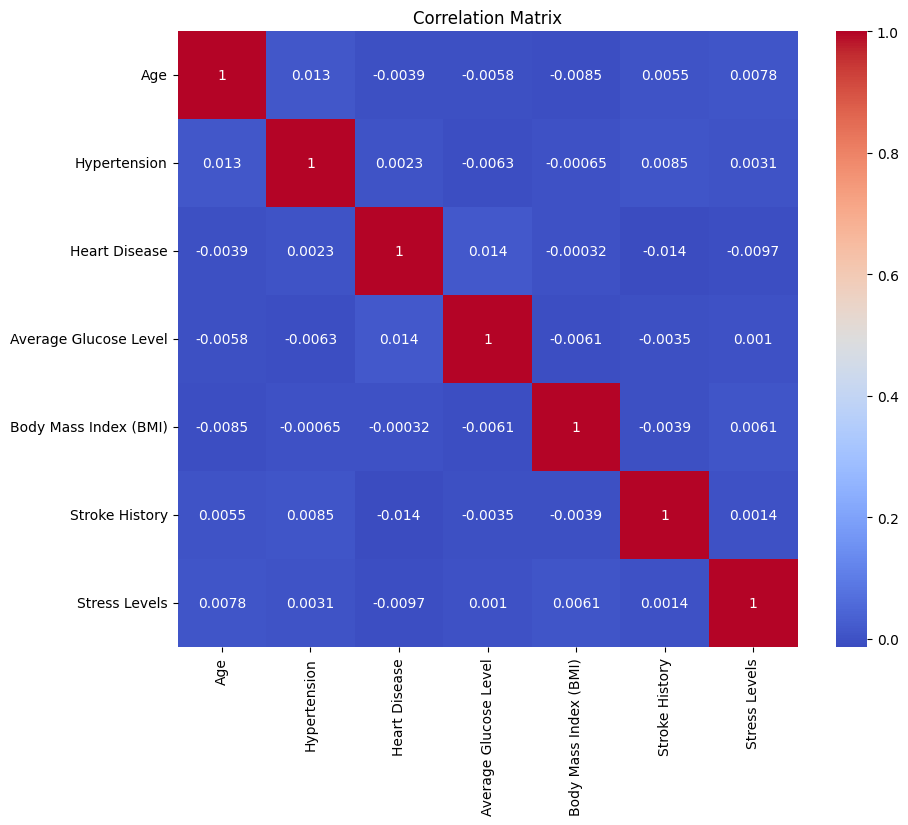

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Patient ID'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

None of the variables show strong correlations (values close to 1 or -1) with each other. This means that the variables in this dataset do not have strong linear relationships.
* this suggests that these variables might be relatively independent of each other


In [43]:
grouped_data = df.groupby('Work Type')['Stress Levels'].mean()

print(grouped_data)


Work Type
Government Job    5.007981
Never Worked      4.961607
Private           5.028103
Self-employed     5.088036
Name: Stress Levels, dtype: float64


* There are 2500 null values in the column "Symptoms".
There are no outliers in the "Stress Level" column.
There is no correlation between any of the numerical columns, meaning all the variables are independent of each other.there is 2500 null values in the coloumn symptoms
* there is no outliers in the coloumn stress level
* there is no correlation between any of the numerical coloumns that is all the variables are independent od each ither
